In [34]:
from sklearn.model_selection import train_test_split

X = data.drop('Satisfied', axis=1)
y = data['Satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate models
print("Random Forest Model:")
print(classification_report(y_test, rf_predictions))

print("Logistic Regression Model:")
print(classification_report(y_test, lr_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Model:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3775
           1       0.99      1.00      0.99     17006

    accuracy                           0.99     20781
   macro avg       0.99      0.98      0.98     20781
weighted avg       0.99      0.99      0.99     20781

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.08      0.00      0.00      3775
           1       0.82      1.00      0.90     17006

    accuracy                           0.82     20781
   macro avg       0.45      0.50      0.45     20781
weighted avg       0.68      0.82      0.74     20781



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Logistic Regression Evaluation
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}")
print(f"Logistic Regression - Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1-Score: {lr_f1}")


Random Forest - Accuracy: 0.9896058899956691, Precision: 0.9915105386416861, Recall: 0.9958250029401388, F1-Score: 0.9936630874845976
Logistic Regression - Accuracy: 0.8156970309417256, Precision: 0.8180150608225526, Recall: 0.9964718334705398, F1-Score: 0.8984677376597211


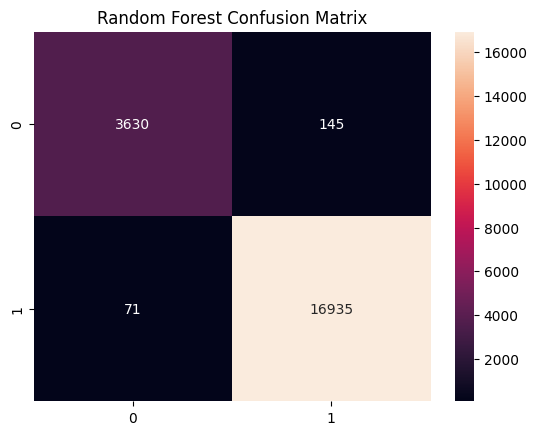

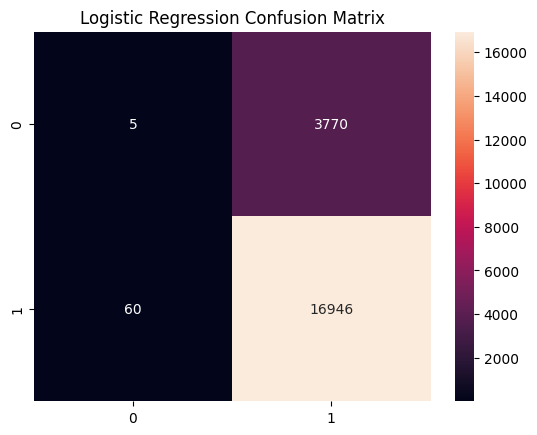

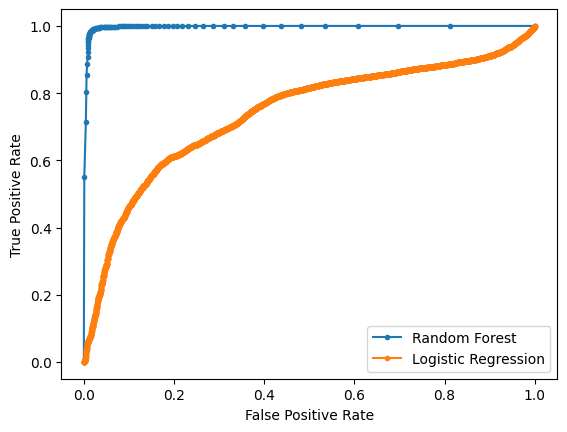

In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)

sns.heatmap(rf_cm, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

sns.heatmap(lr_cm, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ROC Curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
